# Glass

## reference

In [115]:
# https://www.kaggle.com/datasets/uciml/glass/code

# Attribute Information:

#     Id number: 1 to 214 (removed from CSV file)
#     RI: refractive index
#     Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
#     Mg: Magnesium
#     Al: Aluminum
#     Si: Silicon
#     K: Potassium
#     Ca: Calcium
#     Ba: Barium
#     Fe: Iron
#     Type of glass: (class attribute)
#     -- 1 building_windows_float_processed
#     -- 2 building_windows_non_float_processed
#     -- 3 vehicle_windows_float_processed
#     -- 4 vehicle_windows_non_float_processed (none in this database)
#     -- 5 containers
#     -- 6 tableware
#     -- 7 headlamps


## Import Libraries

In [174]:
import pandas as pd
import numpy as np
import re
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample 

## Import Dataset

In [117]:
path = 'https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/glass.csv'
glass = pd.read_csv(path)
glass.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [118]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


## check target labels distribution

In [169]:
num_type = glass.Type.value_counts()
num_type

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

## resample 

In [170]:
glass_2 = glass.copy()
# find the max number of type of target 
num_max = glass.Type.value_counts().max()
# find how many samples do we have to add for each type 
add_num = num_max - num_type
add_num = add_num.sort_index()
# find the sample for each type
for i in add_num.index:
  cond = glass.Type == i
  sample_i = glass[cond]
  # resample from sample for type
  upsample = resample(sample_i, replace = True, n_samples = add_num[i])
  # join the two data together
  glass_2 = pd.concat([glass_2, upsample], axis = 0)
glass_2

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...
192,193,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7
197,198,1.51727,14.70,0.00,2.34,73.28,0.00,8.95,0.66,0.00,7
189,190,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.00,7
185,186,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.00,7


## remove some data which is not important 

In [181]:
glass_3 = glass_2.copy()
glass_3 = glass_4 = glass_3.drop(columns = 'ID')

## standardize 

In [184]:
st = StandardScaler()
glass_3 = st.fit_transform(glass_3)
glass_3 = pd.DataFrame(data = glass_3, index = glass_4.index, columns = glass_4.columns)
glass_3['Type'] = glass_4['Type']
glass_3

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.972312,0.025205,1.519127,-0.755912,-0.965825,-0.470254,-0.244804,-0.414931,-0.463823,1
1,-0.193073,0.270787,0.941810,-0.318865,0.067046,-0.040051,-0.871367,-0.414931,-0.463823,1
2,-0.683221,-0.082852,0.909377,-0.016293,0.349726,-0.132237,-0.905419,-0.414931,-0.463823,1
3,-0.175935,-0.397198,1.000190,-0.436531,-0.063422,0.052136,-0.605758,-0.414931,-0.463823,1
4,-0.258198,-0.338258,0.954783,-0.520579,0.447577,0.031650,-0.707915,-0.414931,-0.463823,1
...,...,...,...,...,...,...,...,...,...,...
192,-0.666083,0.575310,-1.393404,2.084895,0.860726,-0.490740,-0.047300,0.337988,0.426925,7
197,-0.309612,1.066476,-1.393404,1.328467,0.665024,-0.531712,-0.108594,0.827385,-0.463823,7
189,1.877200,2.137216,-0.206337,-0.402912,-2.433589,-0.214181,-0.340150,2.747326,-0.463823,7
185,-2.352464,0.074321,0.682342,0.437563,0.154025,1.271045,-2.505879,1.825001,-0.463823,7


## Visualize the Data

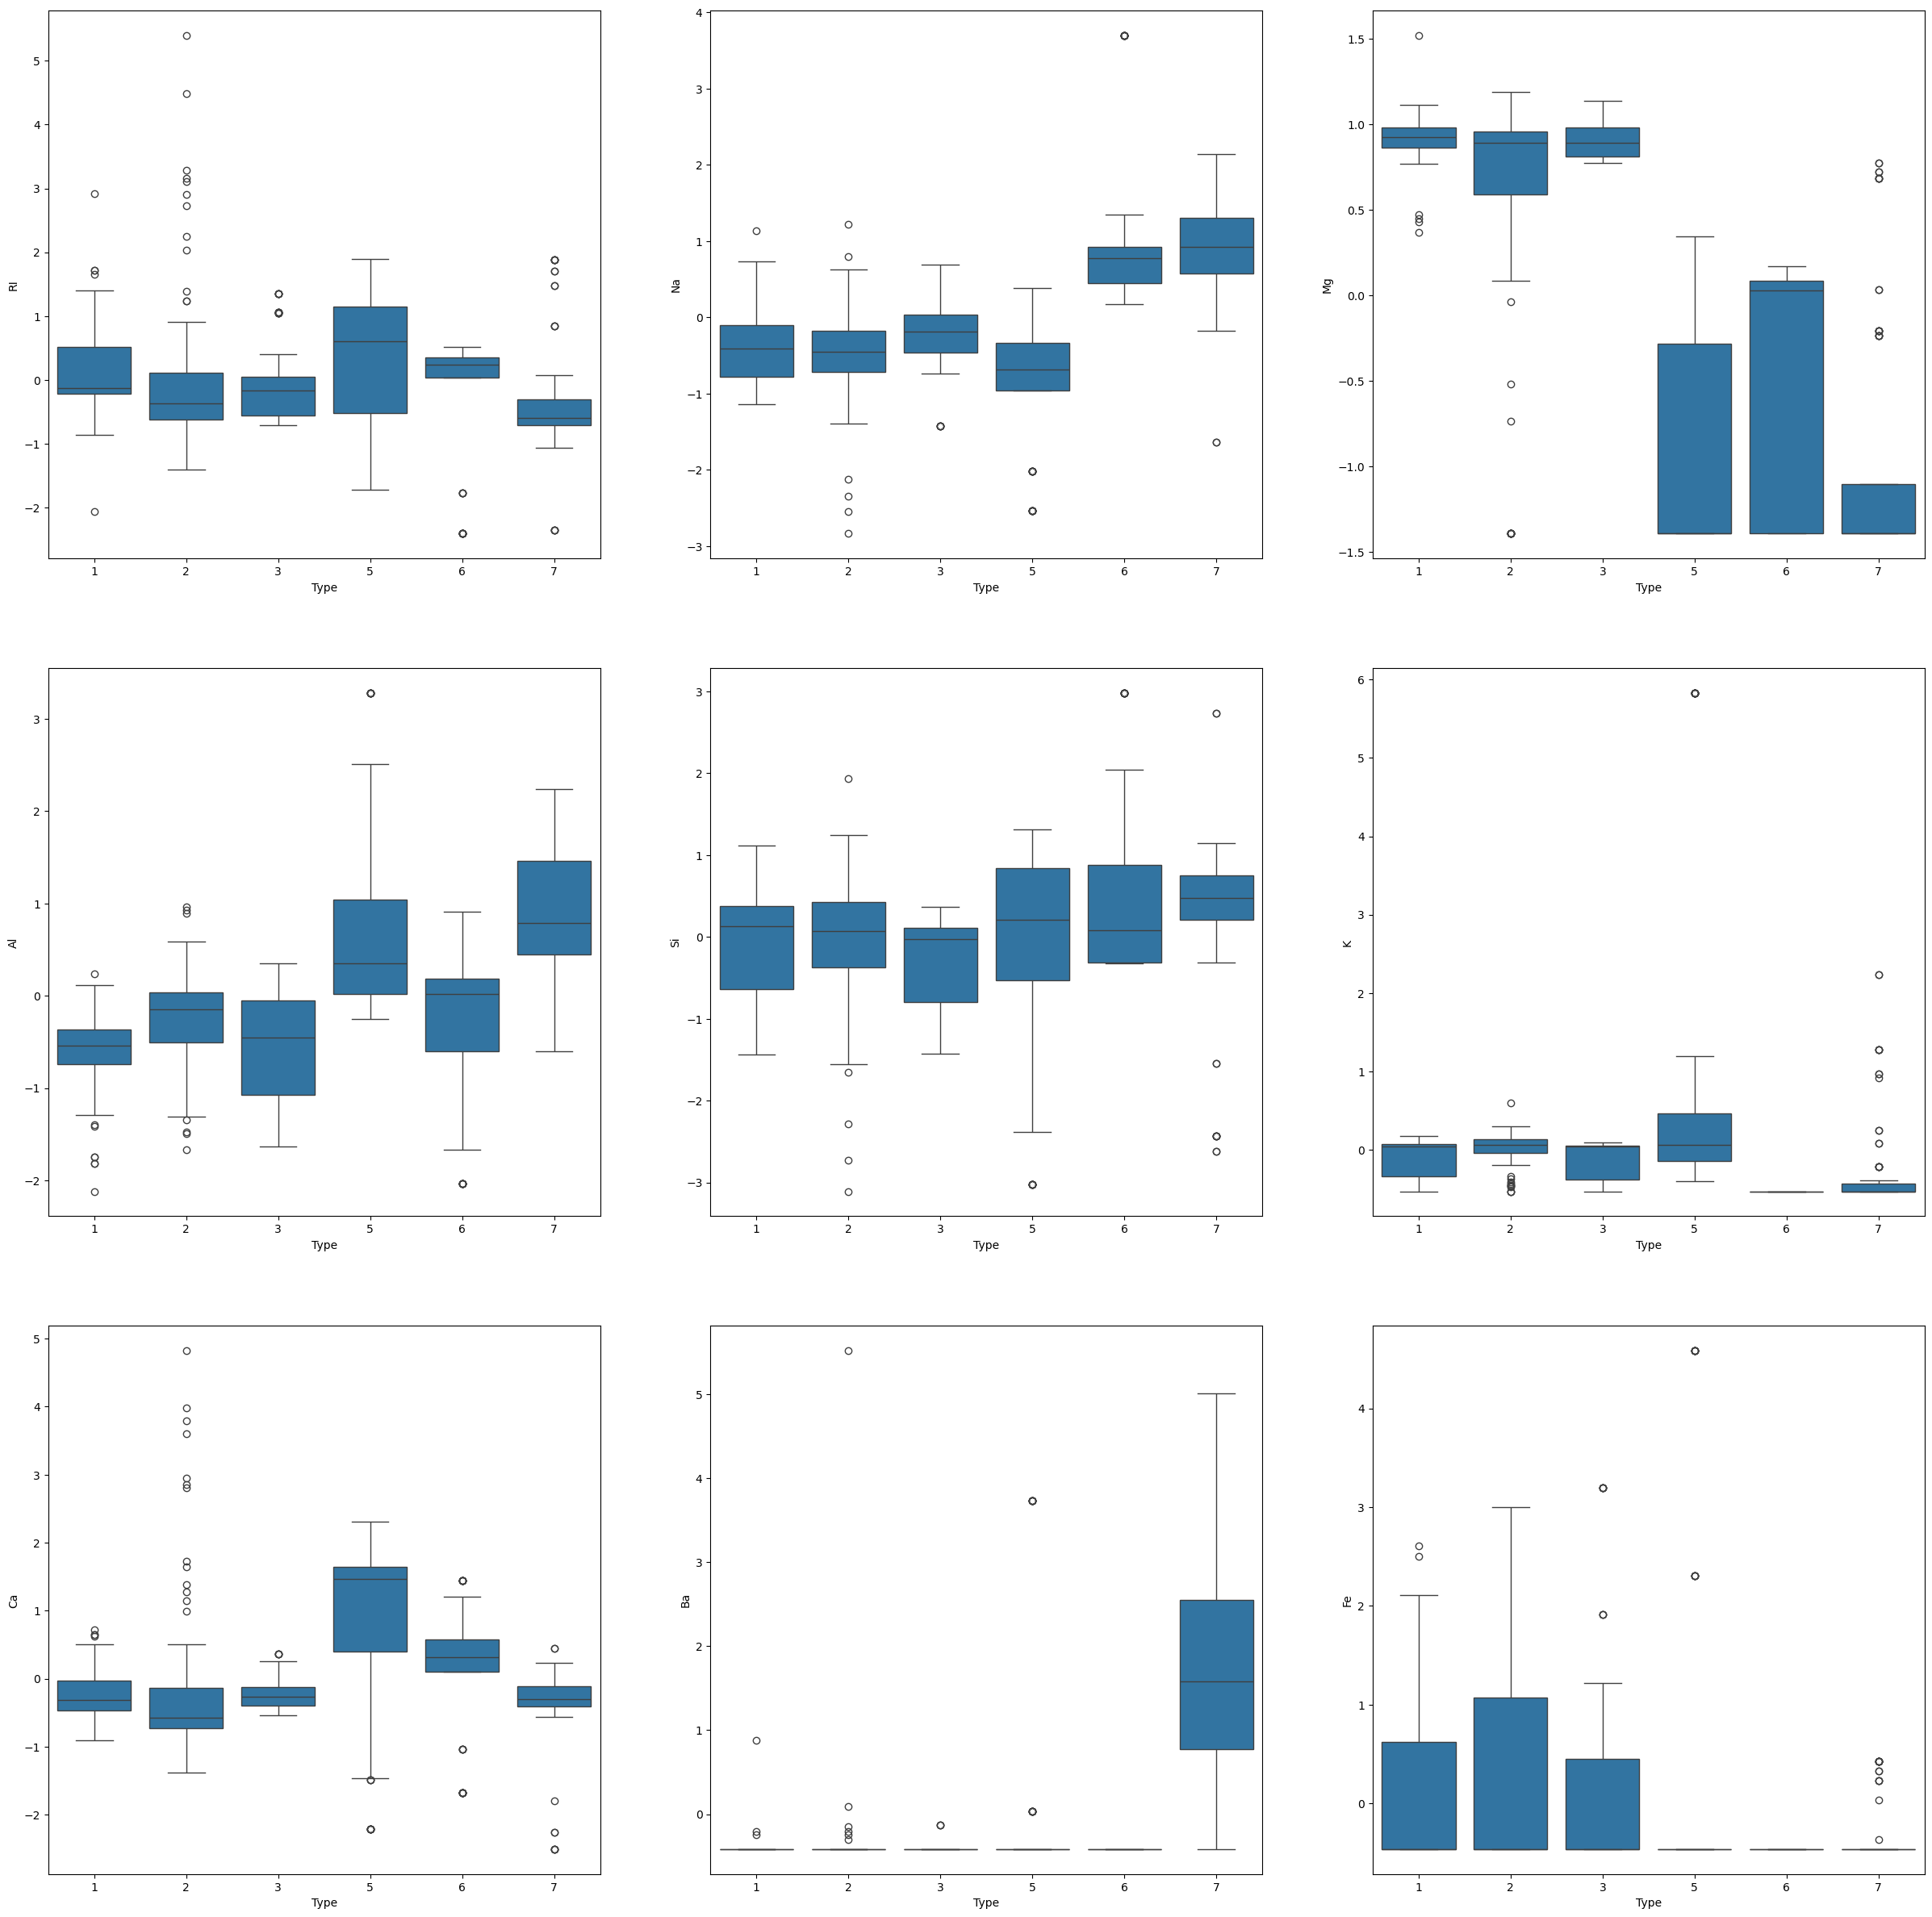

In [213]:
fig, ax = plt.subplots(nrows = 3, ncols =3, figsize = (30,30))
ax = np.ravel(ax)
for i in range(0,9):
  sns.boxplot(ax = ax[i], data = glass_3, y = glass_3.columns.values[i], x = 'Type')
plt.show()